2024-04-03 14:01:08.343234: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 14:01:08.346641: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 14:01:08.403223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 14:01:09.302919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Number of Principal Components: 10, Accuracy: 0.8167
Number of Principal Components: 60, Accuracy: 0.8758
Number of Principal Components: 110, Accuracy: 0.8847
Number of Principal Components: 160, Accuracy: 0.8865
Number of Principal Components: 210, Accuracy: 0.886
Number of Principal Components: 260, Accuracy: 0.8866
Number of Principal Components: 310, Accuracy: 0.886
Number of Principal Components: 360, Accuracy: 0.8873
Number of Principal Components: 410, Accuracy: 0.8874
Number of Principal Components: 460, Accuracy: 0.8873
Number of Principal Components: 510, Accuracy: 0.887


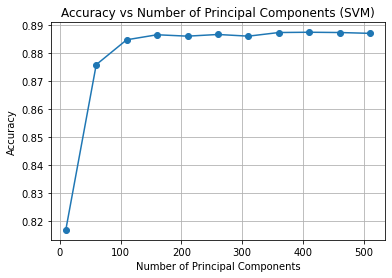

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)


train_images = train_images / 255.0
test_images = test_images / 255.0


accuracies = []

for n_components in range(10, 511, 50):
    pca = PCA(n_components=n_components)
    pca.fit(train_images)
  
    train_images_pca = pca.transform(train_images)
    test_images_pca = pca.transform(test_images)

    clf = SVC()
    clf.fit(train_images_pca, train_labels)

    pred_labels = clf.predict(test_images_pca)

    #accuracy
    accuracy = accuracy_score(test_labels, pred_labels)
    accuracies.append(accuracy)
    print(f"Number of Principal Components: {n_components}, Accuracy: {accuracy}")

# Plotting accuracies
plt.plot(range(10, 511, 50), accuracies, marker='o')
plt.title('Accuracy vs Number of Principal Components (SVM)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
